# Recurrent Neural Network (RNN)
<a id="0"></a>
## Content

* [Sequence Models](#1)
* [Recurrent Neural Network](#2)
* [Implementing Recurrent Neural Network with Keras](#3)
    * [Loading and Preprocessing Data](#4)
    * [Create RNN Model](#5)
    * [Predictions and Visualising RNN Model](#6)
* [Long Short Term Memory (LSTMs)](#7)
* [Implementing Long Short Term Memory with Keras](#8)
    * [Loading and Visualizing Data](#9)
    * [Preprocessing Data](#10)
    * [Create LSTM Model](#11)
    * [Predictions and Visualising LSTM Model](#12)
* [Conclusion](#13)

<a id="1"></a>
## Sequence Models

* Sequence model plays an over time
* Speech recognition, natural language process(NLP), music generation
* Apple Siri and Google's voice search

[Yukarı](#0)<a id="2"></a>
## Recurrent Neural Network

* RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.
* This is the reason why they are the preferred algorithm for sequential data like time series, speech, text, financial data, audio, video, weather and much more because they can form a much deeper understanding of a sequence and its context, compared to other algorithms.
* Not only feeds output but also gives feed backs into itself. Because RNN has internal memory
* temporal loop = temporal cycle. Feeds itself.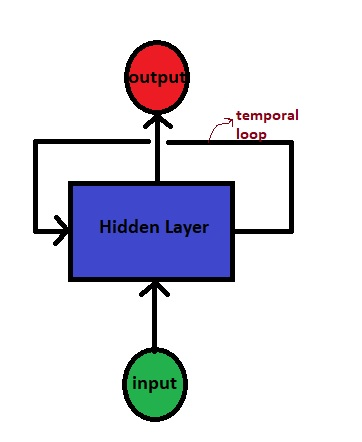
* Those who have memory, short term memory remember what happened on the previous node. They remember the past.
* For example, why is it important to remember the past, we learn something from what we do, and we build on what we have learned, and what we learn new. You can think of RNN with the same logic. As in the movie example. 

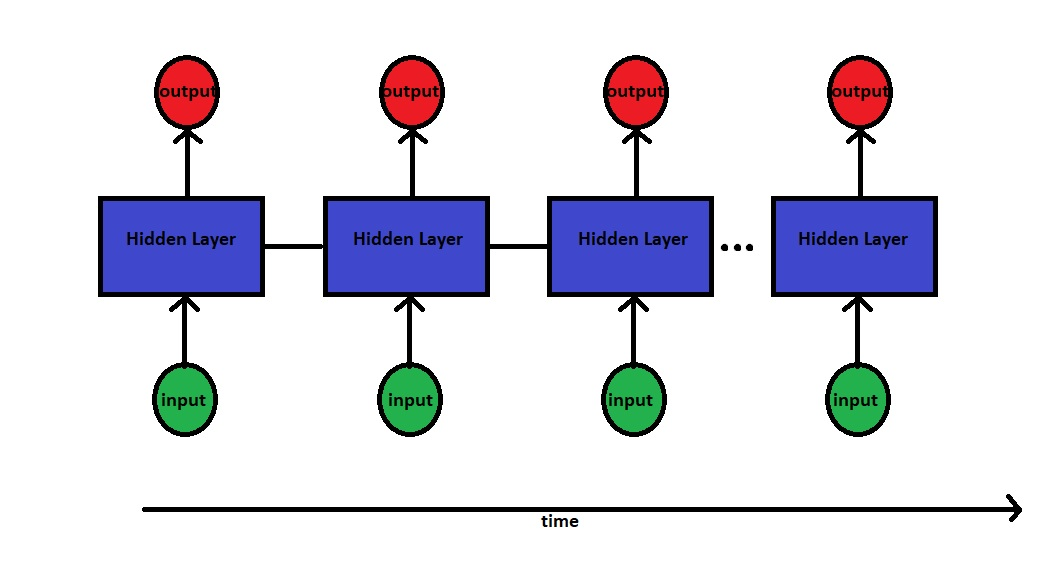

* Let's look at sample RNN structures
* One to Many
    * Input is a picture output, the sentence in that picture is "Adam surf yapıyor"

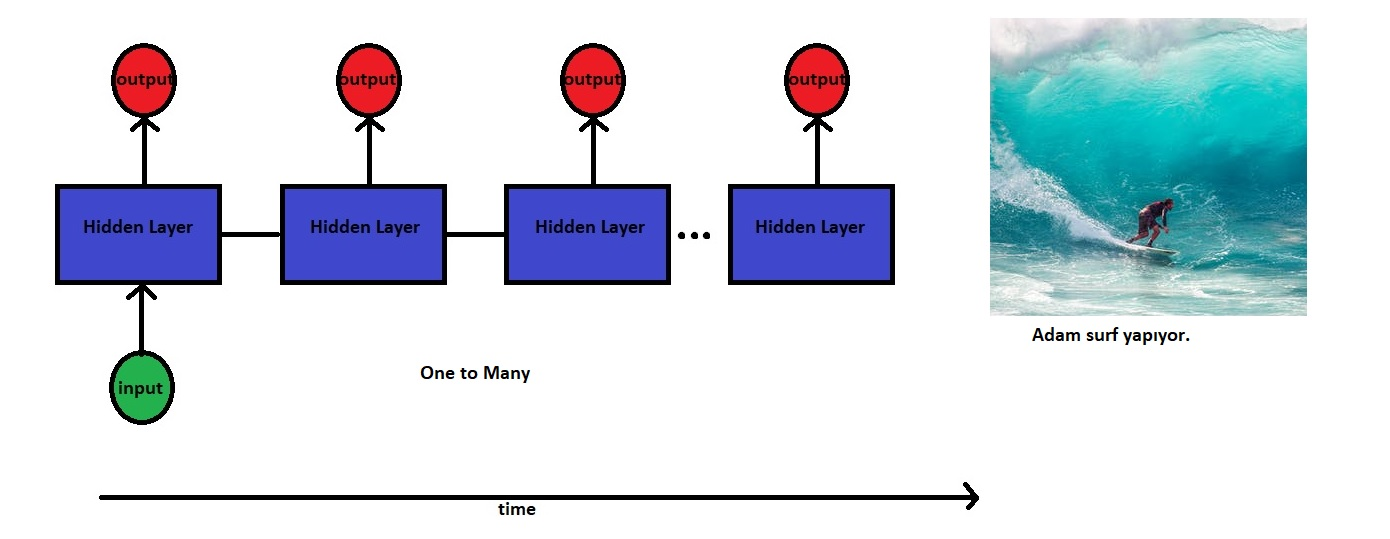

* Many to One
    * Input is a sentence, output is an emotion, such as optimistic and cheerful.

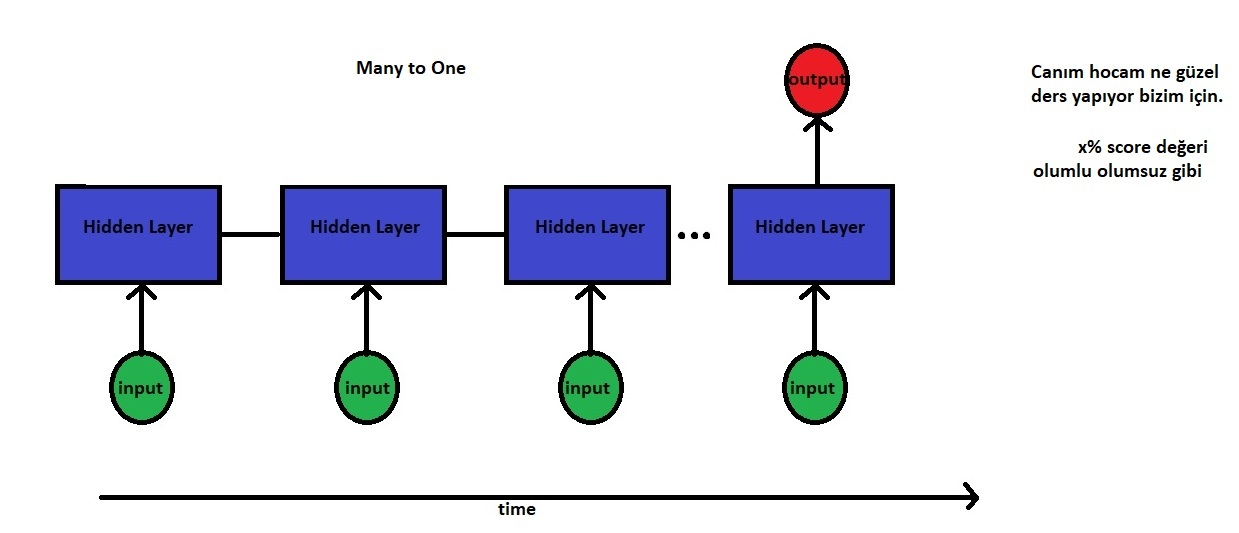

* Many to Many
    * For example, to translate a sentence from English to Turkish using google translate.

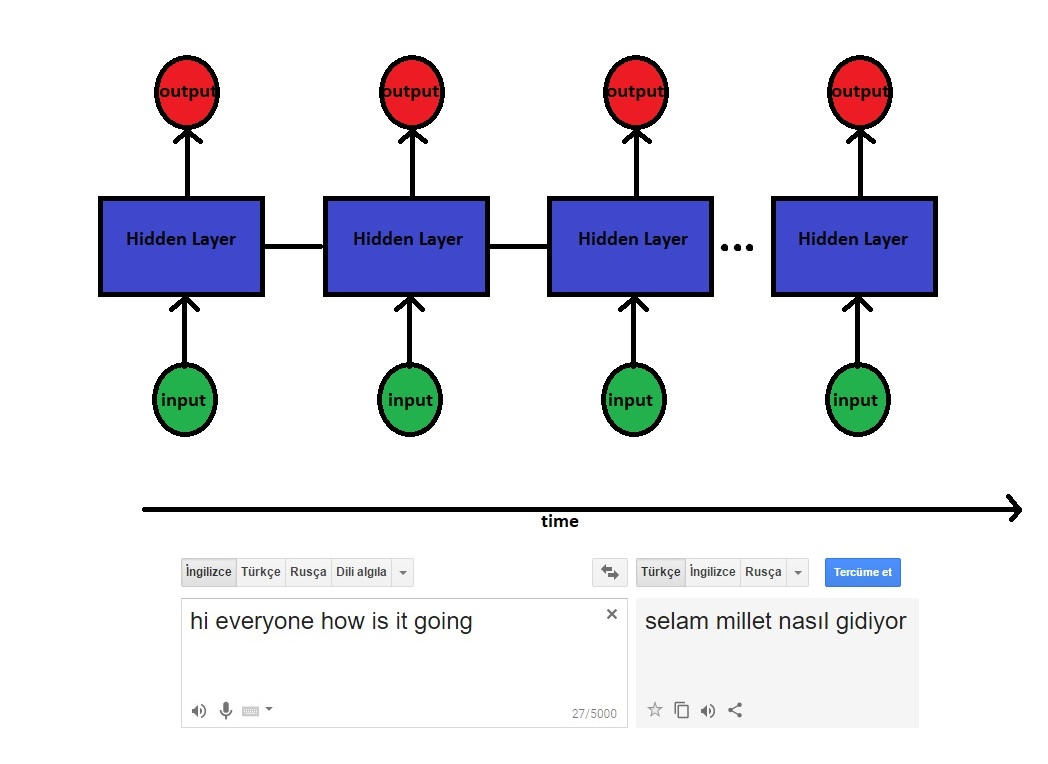

* RNN has short term memory but LSTM can have long term memory as well.
* Exploiding Gradients: Gradient'in çok büyük olması durumu. Gereksiz yere belli weightlere önem kazandırır.
* Vanishing Gradients: Gradient'in çok küçük olması durumu. Yavaş öğrenir.
* Gradient neydi arkadaşlar costa göre weightlerde ki değişim.

[Yukarı](#0)<a id="3"></a>
## Implementing Recurrent Neural Network with Keras

* [Loading and Preprocessing Data](#4)
* [Create RNN Model](#5)
* [Predictions and Visualising RNN Model](#6)


<a id="4"></a>
### Loading and Preprocessing Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing train dataset
dataset_train = pd.read_csv('Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train = dataset_train.loc[:,["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

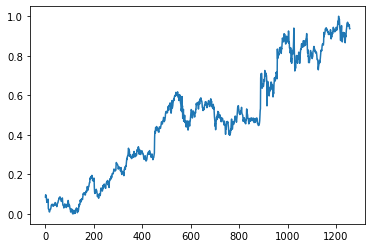

In [6]:
plt.plot(train_scaled)
plt.show()

In [7]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps,1258):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [9]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

[Yukarı](#0)<a id="5"></a>
### Create RNN Model

In [10]:
# Importing the Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [11]:
# Initialising the RNN
regressor = Sequential()

In [12]:
# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,
                        activation= 'tanh',
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [13]:
# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,
                        activation= 'tanh',
                        return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,
                        activation= 'tanh',
                        return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

In [16]:
# Adding output layer
regressor.add(Dense(units = 1))

In [17]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
# Fitting the RNN to the train dataset
regressor.fit(X_train,y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 28ms/step - loss: 0.4154
Epoch 2/100
38/38 [==============================] - 1s 27ms/step - loss: 0.2170
Epoch 3/100
38/38 [==============================] - 1s 27ms/step - loss: 0.1480
Epoch 4/100
38/38 [==============================] - 1s 27ms/step - loss: 0.1034
Epoch 5/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0864
Epoch 6/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0732
Epoch 7/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0584
Epoch 8/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0495: 0s - loss: 0.049
Epoch 9/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0426
Epoch 10/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0386
Epoch 11/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0360
Epoch 12/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0304
Epoch 1

38/38 [==============================] - 1s 37ms/step - loss: 0.0022


[Yukarı](#0)<a id="6"></a>
### Predictions and Visualising RNN Model

In [19]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [20]:
real_stock_price = dataset_test.loc[:,["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [21]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1, 1)
inputs = scaler.transform(inputs)      # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [22]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i - timesteps : i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

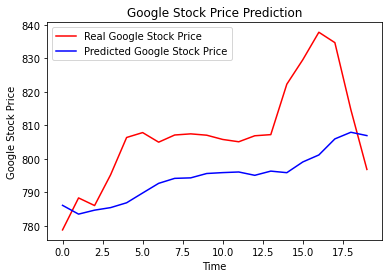

In [23]:
# Visualising the results
plt.plot(real_stock_price, 
         color = 'red', 
         label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,
        color = 'blue',
        label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

[Yukarı](#0)<a id="7"></a>
## Long Short Term Memory (LSTMs)

* LSTM is variant of RNN.
* LSTM de RNN'den farklı olarak long term memory var. 
* LSTM architecture:
    * x: scaling of information
    * +: Adding information
    * sigmoid layer. Sigmoid memory den bir şeyi hatırlamak için yada unutmak için kullanılır. 1 yada 0'dır.
    * tanh: activation function tanh. Tanh vanishing gradient(yavaş öğrenme - çok küçük gradient) problemini çözer. Çünkü parametreleri update ederken türev alıyorduk. Tanh'ın türevi hemen sıfır'a ulaşmaz.
    * h(t-1): output of LSTM unit
    * c(t-1): memory from previous LSTM unit
    * X(t): input
    * c(t): new updated memory
    * h(t): output
    * From c(t-1) to c(t) is memory pipeline. or only memory.
    * Oklar vektör.
    * h(t-1) ile X(t) birleşmiyor parallel iki yol olarak düşünebilirsiniz.
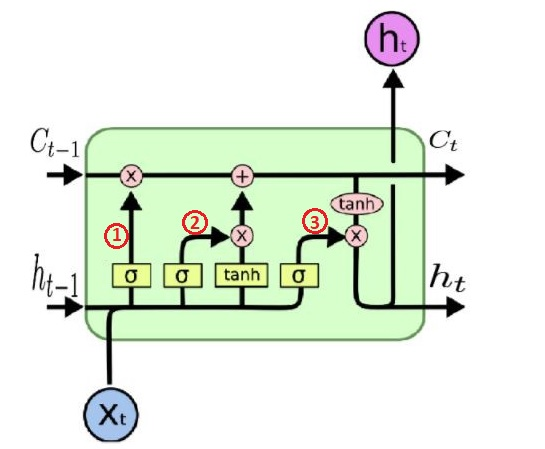

* 1) Forget gate: input olarak X(t) ve h(t-1) alır. Gelen bilginin unutulup unutulmayacağına karar verir.
* 2) Input gate: Hangi bilginin memory de depolanıp depolanmayacağına karar verir.
* 3) Output gate: Hangi bilginin output olup olmayacağına karar verir.
* Örneğin: 
    * ... "Boys are watching TV"
    * "On the other hand girls are playing baseball."
    * Forget "boys". new input is "girls" and output is "girls"

[Yukarı](#0)<a id="8"></a>
## Implementing Long Short Term Memory with Keras

* [Loading and Visualizing Data](#9)
* [Preprocessing Data](#10)
* [Create LSTM Model](#11)
* [Predictions and Visualising LSTM Model](#12)

<a id="9"></a>
### Loading and Visualizing Data

In [24]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [25]:
data = pd.read_csv('international-airline-passengers.csv', skipfooter = 5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


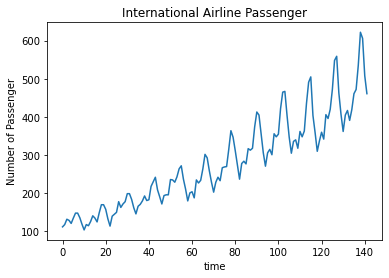

In [26]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("International Airline Passenger")
plt.show()

[Yukarı](#0)<a id="10"></a>
### Preprocessing Data

* reshape
* change type
* scaling
* train test split
* Create dataset

In [27]:
dataset = dataset.reshape(-1, 1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [28]:
# Scaling
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

In [29]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size : {}, test size : {}".format(len(train), len(test)))

train size : 71, test size : 71


In [30]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train) - time_stemp - 1):
    a = train[i : (i + time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp,0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)

In [31]:
dataX = []
dataY = []
for i in range(len(test) - time_stemp - 1):
    a = test[i : (i + time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)

In [32]:
trainX = numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0],1,testX.shape[1]))

[Yukarı](#0)<a id="11"></a>
### Create LSTM Model

In [33]:
# Model
model = Sequential()
model.add(LSTM(10, input_shape = (1, time_stemp)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 50, batch_size = 1)

Epoch 1/50
60/60 [==============================] - 1s 754us/step - loss: 0.0166
Epoch 2/50
60/60 [==============================] - 0s 823us/step - loss: 0.0043
Epoch 3/50
60/60 [==============================] - 0s 975us/step - loss: 0.0038
Epoch 4/50
60/60 [==============================] - 0s 903us/step - loss: 0.0036
Epoch 5/50
60/60 [==============================] - 0s 940us/step - loss: 0.0034
Epoch 6/50
60/60 [==============================] - 0s 999us/step - loss: 0.0033
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 8/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 9/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 10/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 11/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 12/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 13/50
60/60 [==================

[Yukarı](#0)<a id="12"></a>
### Predictions and Visualising LSTM Model

In [34]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [35]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [36]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test Score : %.2f RMSE' % (testScore))

Train Score : 17.32 RMSE
Test Score : 60.35 RMSE


In [37]:
# Shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict) + time_stemp,:] = trainPredict

In [38]:
# Shifting test predictions for plotting 
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict) + (time_stemp*2)+1:len(dataset)-1,:] = testPredict

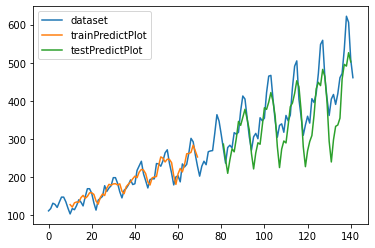

In [39]:
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label = 'dataset')
plt.plot(trainPredictPlot, label = 'trainPredictPlot')
plt.plot(testPredictPlot, label = 'testPredictPlot')
plt.legend()
plt.show()

[Yukarı](#0)<a id="13"></a>
## Conclusion

* Sequence Models
* Recurrent Neural Network (RNN) Implementing Recurrent Neural Network with Keras
    * Loading and Preprocessing Data
    * Create RNN Model
    * Predictions and Visualising RNN Model
* Long Short Term Memory (LSTMs)
* Implementing Long Short Term Memory with Keras
    * Loading and Visualizing Data
    * Preprocessing Data
    * Create LSTM Model
    * Predictions and Visualising RNN Model
    * Implementing Long Short Term Memory